# BANK LOAN DEFAULT PREDICTION

In [41]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [42]:
#load the dataset and check the first five columns
df = pd.read_csv("/content/Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [43]:
#checking the columns
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [44]:
#checking the shape of the data
df.shape

(148670, 34)

We have 148670 rows and thirty four columns

In [45]:
# Checking the datatypes
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

We note that we have several object type data in our dataset which we will have to change to numeric.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [47]:
#checking for null values
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

There are alot of missing values in our dataset. Specifically in the columns, loan_limit, approv_in_adv,loan_purpose, rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,property_value,income,age,submission_of_application,LTV,dtir1

In [48]:
# checking the percentage of missing data to know how to deal with it
missing_percentage= (df.isna().sum())/len(df)
perc=(missing_percentage*100).apply(lambda x: f'{x:.2f}%')
perc



ID                            0.00%
year                          0.00%
loan_limit                    2.25%
Gender                        0.00%
approv_in_adv                 0.61%
loan_type                     0.00%
loan_purpose                  0.09%
Credit_Worthiness             0.00%
open_credit                   0.00%
business_or_commercial        0.00%
loan_amount                   0.00%
rate_of_interest             24.51%
Interest_rate_spread         24.64%
Upfront_charges              26.66%
term                          0.03%
Neg_ammortization             0.08%
interest_only                 0.00%
lump_sum_payment              0.00%
property_value               10.16%
construction_type             0.00%
occupancy_type                0.00%
Secured_by                    0.00%
total_units                   0.00%
income                        6.15%
credit_type                   0.00%
Credit_Score                  0.00%
co-applicant_credit_type      0.00%
age                         

All the missing values are below 30% and hence I will impute them rather than dropping them.

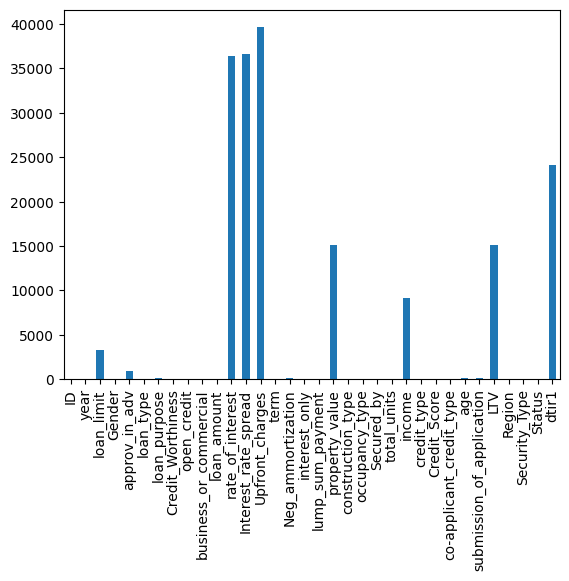

In [49]:
df.isna().sum().plot.bar()
plt.show()

In [50]:
#creating a list of categorical and numeric functions
categ_var=[]
numeric_var=[]
for i in df.columns:
  if (df[i].dtype=="object"):
    categ_var.append(i)
  else:
    numeric_var.append(i)

In [51]:
print("cat_var", categ_var,"\n")
print("numeric_var",numeric_var,"\n")

cat_var ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type'] 

numeric_var ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1'] 



## Imputing Missing Values using SimpleImputer

In [52]:
from sklearn.impute import SimpleImputer

# Identify missing values
missing_cols = df.columns[df.isnull().any()]

# Impute missing values using most frequent for categorical columns
imputer = SimpleImputer(strategy='most_frequent')
df[missing_cols] = imputer.fit_transform(df[missing_cols])


In [53]:
#checking missing vales
df.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

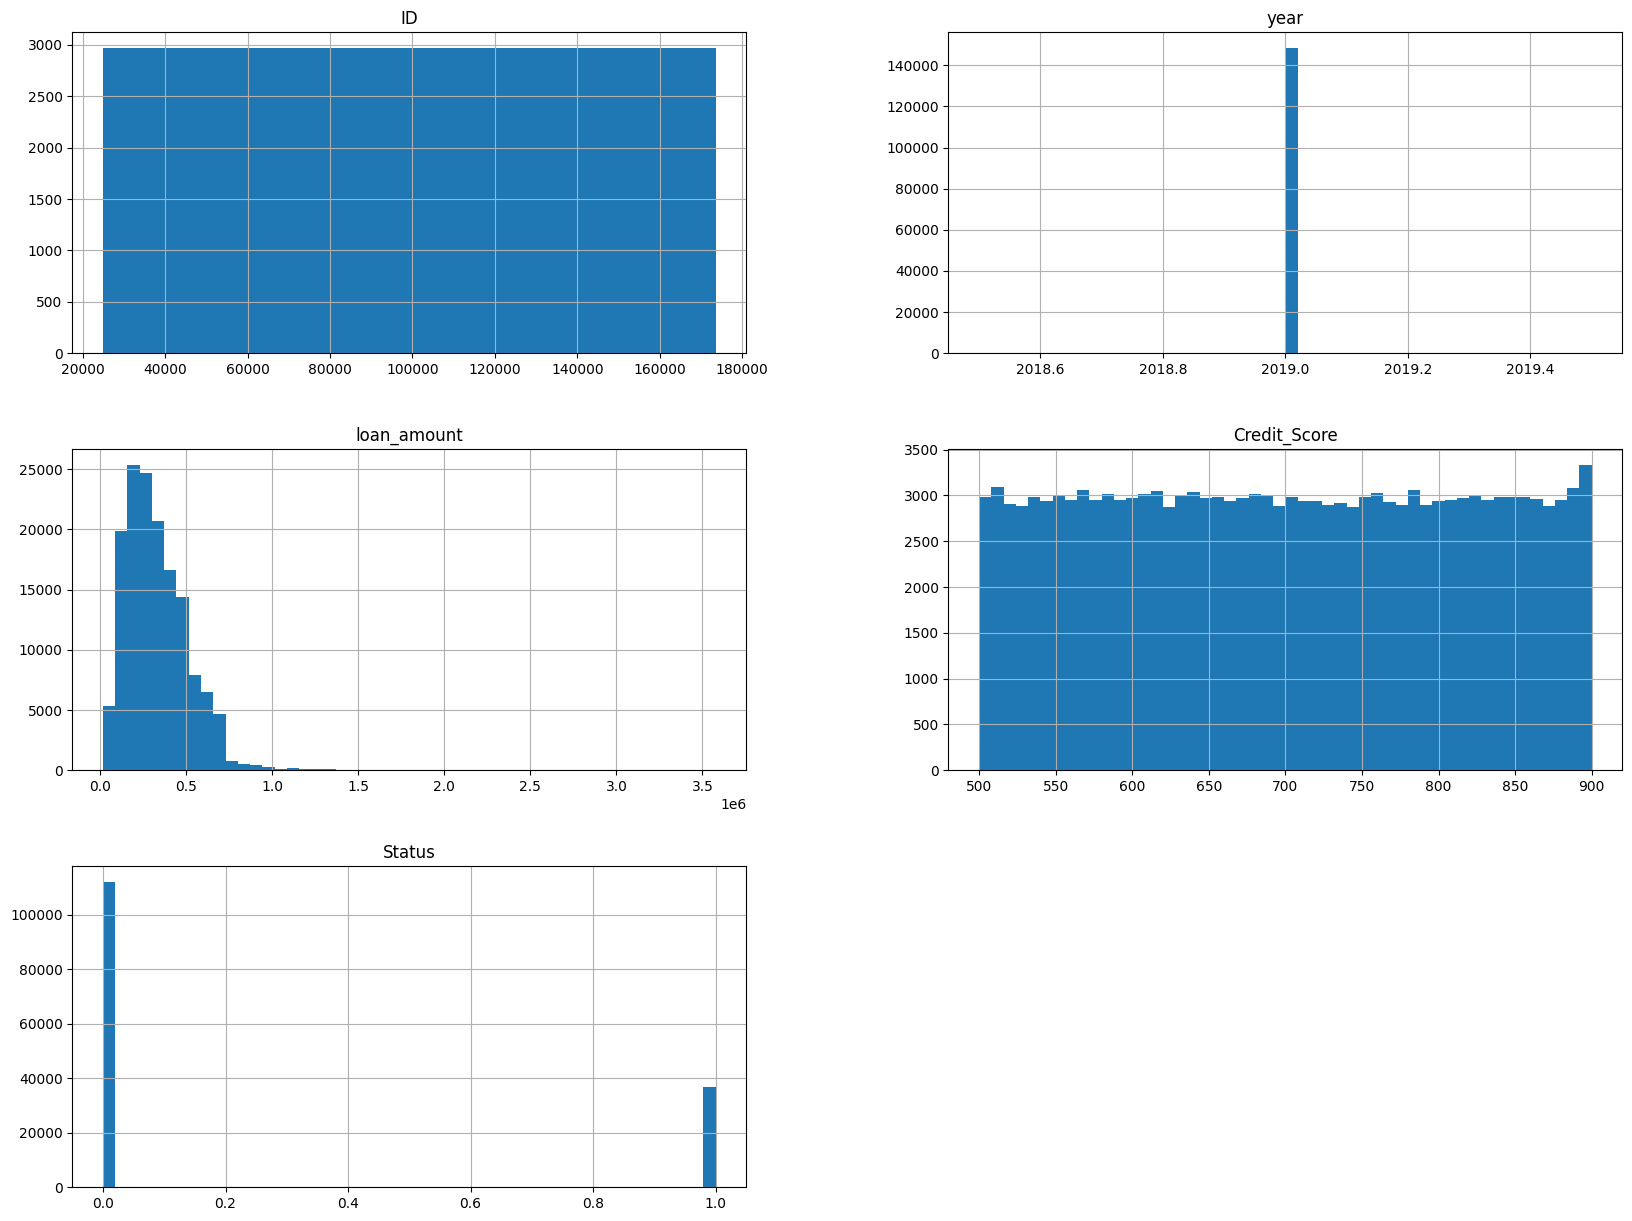

In [54]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [55]:
# status value count
df['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

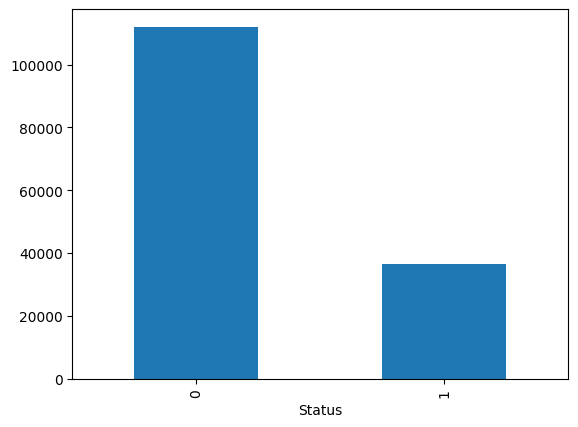

In [56]:
#plot showing the count of status column to check for class imbalance
df['Status'].value_counts().plot(kind='bar')
plt.show()

From the plot above we note that there is a class imbalance and hence we have to balance the classes later on.

In [57]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Dictionary to store the mappings
label_mappings = {}

# Loop through each categorical variable and encode it
for var in categ_var:
    label_encoder.fit(df[var])
    label_mappings[var] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mappings
for var, mapping in label_mappings.items():
    print(f"\nMapping for {var}:")
    for original_value, encoded_value in mapping.items():
        print(f"  {original_value} -> {encoded_value}")



Mapping for loan_limit:
  cf -> 0
  ncf -> 1

Mapping for Gender:
  Female -> 0
  Joint -> 1
  Male -> 2
  Sex Not Available -> 3

Mapping for approv_in_adv:
  nopre -> 0
  pre -> 1

Mapping for loan_type:
  type1 -> 0
  type2 -> 1
  type3 -> 2

Mapping for loan_purpose:
  p1 -> 0
  p2 -> 1
  p3 -> 2
  p4 -> 3

Mapping for Credit_Worthiness:
  l1 -> 0
  l2 -> 1

Mapping for open_credit:
  nopc -> 0
  opc -> 1

Mapping for business_or_commercial:
  b/c -> 0
  nob/c -> 1

Mapping for Neg_ammortization:
  neg_amm -> 0
  not_neg -> 1

Mapping for interest_only:
  int_only -> 0
  not_int -> 1

Mapping for lump_sum_payment:
  lpsm -> 0
  not_lpsm -> 1

Mapping for construction_type:
  mh -> 0
  sb -> 1

Mapping for occupancy_type:
  ir -> 0
  pr -> 1
  sr -> 2

Mapping for Secured_by:
  home -> 0
  land -> 1

Mapping for total_units:
  1U -> 0
  2U -> 1
  3U -> 2
  4U -> 3

Mapping for credit_type:
  CIB -> 0
  CRIF -> 1
  EQUI -> 2
  EXP -> 3

Mapping for co-applicant_credit_type:
  CIB ->

In [58]:


from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Dictionary to store the mappings
label_mappings = {}

# Loop through each categorical variable and encode it
for var in categ_var:
    label_encoder.fit(df[var])
    label_mappings[var] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mappings
for var, mapping in label_mappings.items():
    print(f"\nMapping for {var}:")
    for original_value, encoded_value in mapping.items():
        print(f"  {original_value} -> {encoded_value}")


Mapping for loan_limit:
  cf -> 0
  ncf -> 1

Mapping for Gender:
  Female -> 0
  Joint -> 1
  Male -> 2
  Sex Not Available -> 3

Mapping for approv_in_adv:
  nopre -> 0
  pre -> 1

Mapping for loan_type:
  type1 -> 0
  type2 -> 1
  type3 -> 2

Mapping for loan_purpose:
  p1 -> 0
  p2 -> 1
  p3 -> 2
  p4 -> 3

Mapping for Credit_Worthiness:
  l1 -> 0
  l2 -> 1

Mapping for open_credit:
  nopc -> 0
  opc -> 1

Mapping for business_or_commercial:
  b/c -> 0
  nob/c -> 1

Mapping for Neg_ammortization:
  neg_amm -> 0
  not_neg -> 1

Mapping for interest_only:
  int_only -> 0
  not_int -> 1

Mapping for lump_sum_payment:
  lpsm -> 0
  not_lpsm -> 1

Mapping for construction_type:
  mh -> 0
  sb -> 1

Mapping for occupancy_type:
  ir -> 0
  pr -> 1
  sr -> 2

Mapping for Secured_by:
  home -> 0
  land -> 1

Mapping for total_units:
  1U -> 0
  2U -> 1
  3U -> 2
  4U -> 3

Mapping for credit_type:
  CIB -> 0
  CRIF -> 1
  EQUI -> 2
  EXP -> 3

Mapping for co-applicant_credit_type:
  CIB ->

In [59]:
# Update DataFrame with encoded values
for var, mapping in label_mappings.items():
    df[var] = df[var].map(mapping)


In [60]:
df.dtypes

ID                            int64
year                          int64
loan_limit                    int64
Gender                        int64
approv_in_adv                 int64
loan_type                     int64
loan_purpose                  int64
Credit_Worthiness             int64
open_credit                   int64
business_or_commercial        int64
loan_amount                   int64
rate_of_interest             object
Interest_rate_spread         object
Upfront_charges              object
term                         object
Neg_ammortization             int64
interest_only                 int64
lump_sum_payment              int64
property_value               object
construction_type             int64
occupancy_type                int64
Secured_by                    int64
total_units                   int64
income                       object
credit_type                   int64
Credit_Score                  int64
co-applicant_credit_type      int64
age                         

In [61]:
numeric_cols = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term',
                'property_value', 'income', 'LTV', 'dtir1', 'Status', 'Credit_Score']

for col in numeric_cols:

    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the updated DataFrame
print(df.dtypes)


ID                             int64
year                           int64
loan_limit                     int64
Gender                         int64
approv_in_adv                  int64
loan_type                      int64
loan_purpose                   int64
Credit_Worthiness              int64
open_credit                    int64
business_or_commercial         int64
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization              int64
interest_only                  int64
lump_sum_payment               int64
property_value               float64
construction_type              int64
occupancy_type                 int64
Secured_by                     int64
total_units                    int64
income                       float64
credit_type                    int64
Credit_Score                   int64
co-applicant_credit_type       int64
a

In [62]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0,3,0,0,0,0,0,1,...,3,758,0,0,1,98.728814,3,1,1,45.0
1,24891,2019,0,2,0,1,0,0,0,0,...,2,552,1,3,1,81.250000,0,1,1,37.0
2,24892,2019,0,2,1,0,0,0,0,1,...,3,834,0,1,1,80.019685,3,1,0,46.0
3,24893,2019,0,2,0,0,3,0,0,1,...,3,587,0,2,0,69.376900,0,1,0,42.0
4,24894,2019,0,1,1,0,0,0,0,1,...,1,602,1,0,0,91.886544,0,1,0,39.0


In [63]:
df.shape

(148670, 34)

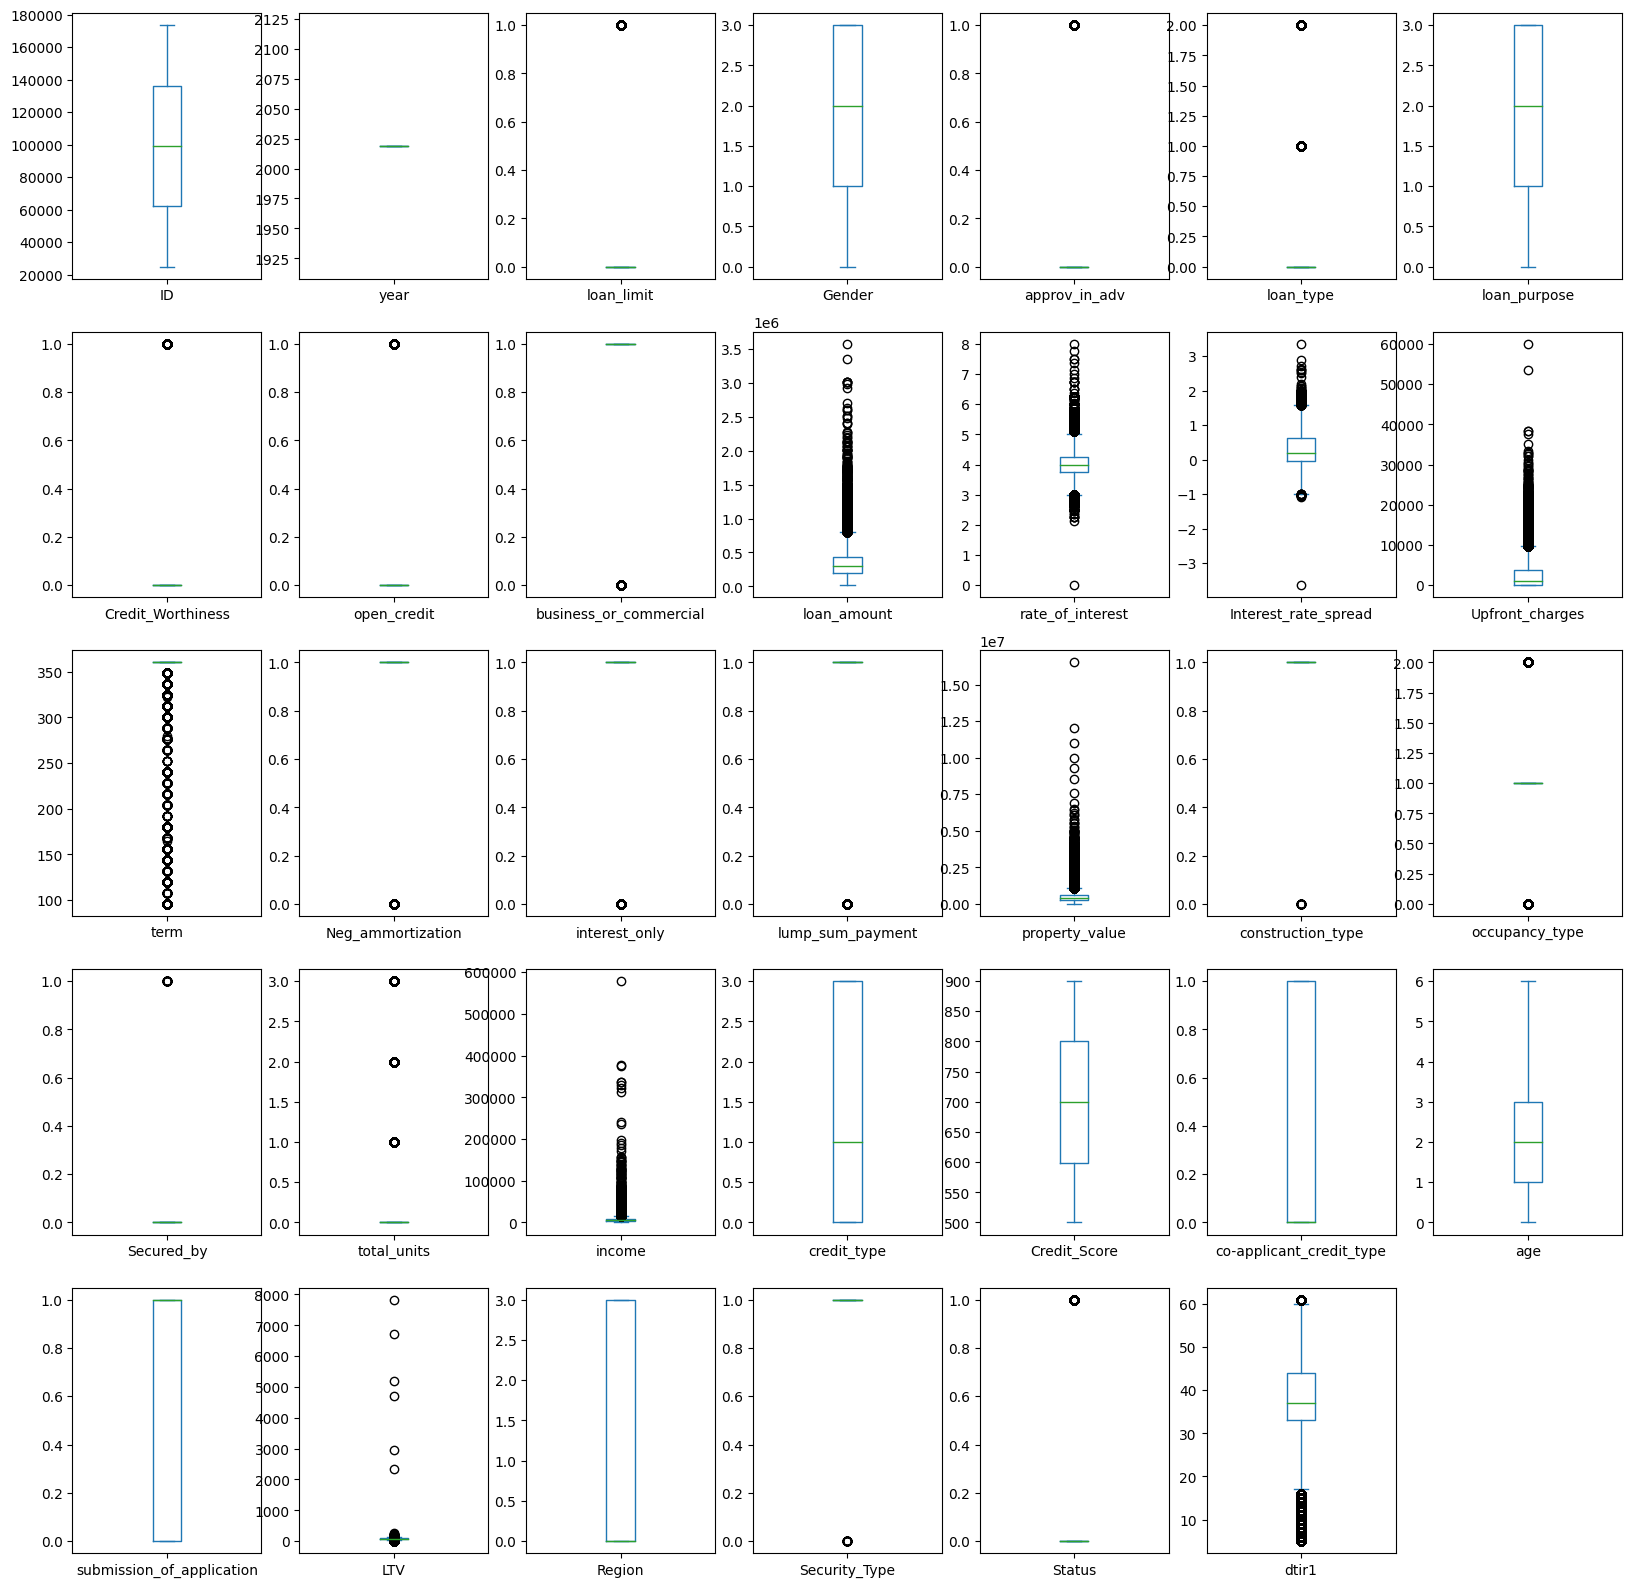

In [64]:
# Determine the number of rows and columns needed to fit 34 plots
num_plots = 34
num_cols = 7
num_rows = (num_plots - 1) // num_cols + 1

# Plot the box plots with the determined layout
df.plot(kind="box", subplots=True, layout=(num_rows, num_cols), figsize=(20, 20));


In [65]:
df['loan_amount'].unique()

array([ 116500,  206500,  406500,  456500,  696500,  706500,  346500,
        266500,  376500,  436500,  136500,  466500,  226500,   76500,
        356500,  156500,  586500,  306500,  316500,  336500,  426500,
        476500,  196500,  186500,  246500,  216500,  506500,  656500,
        256500,  396500,  166500,  236500,  866500,  416500,  386500,
        596500,  606500,   86500,  286500,  146500,  446500,  636500,
        486500,  326500,   56500,  906500,  496500,  106500,  126500,
        296500,  176500, 1376500,  566500,  686500,  556500,  676500,
        366500,  276500,  716500,   66500,  616500,   96500,  826500,
         26500,  666500,  546500,  986500,  526500, 1226500,  726500,
       1486500, 1416500,  536500,  796500,  516500,   46500,  876500,
        576500,  626500, 1506500,  886500,  816500,  646500,  776500,
        746500,  736500,  896500,  836500,  806500, 1386500,  976500,
        926500,  786500,  766500, 1176500, 2006500,  756500, 1136500,
        966500, 1356

In [66]:
df['rate_of_interest'].unique()

array([3.99 , 4.56 , 4.25 , 4.   , 4.5  , 4.125, 4.875, 3.49 , 4.375,
       3.625, 3.175, 2.99 , 4.99 , 5.25 , 3.75 , 3.375, 3.25 , 2.75 ,
       3.875, 3.5  , 4.75 , 3.125, 5.19 , 4.49 , 2.875, 5.125, 4.625,
       3.7  , 5.   , 3.   , 5.375, 4.18 , 3.69 , 5.5  , 3.65 , 5.75 ,
       3.775, 3.56 , 5.625, 6.24 , 4.475, 3.4  , 2.925, 3.925, 5.74 ,
       5.875, 3.45 , 4.275, 2.975, 3.725, 2.85 , 3.675, 3.55 , 3.93 ,
       2.375, 3.85 , 3.525, 2.725, 2.5  , 2.6  , 5.99 , 5.49 , 8.   ,
       3.025, 3.8  , 2.775, 3.05 , 3.325, 6.   , 3.825, 3.15 , 3.1  ,
       4.4  , 3.3  , 4.05 , 6.75 , 4.025, 3.475, 2.625, 3.225, 3.575,
       4.175, 3.9  , 2.95 , 3.075, 3.275, 7.   , 3.425, 5.69 , 5.3  ,
       3.2  , 3.6  , 2.65 , 3.35 , 7.75 , 4.225, 2.25 , 3.95 , 4.7  ,
       2.125, 2.8  , 0.   , 4.2  , 3.975, 4.075, 2.675, 7.375, 4.44 ,
       4.865, 4.15 , 6.125, 4.1  , 6.375, 6.5  , 4.35 , 4.3  , 6.25 ,
       2.475, 4.425, 4.525, 7.5  , 4.55 , 4.95 , 4.82 , 6.875, 4.325,
       2.575, 2.9  ,

In [67]:
# Convert to list to print all unique values
unique_upfront_charges = df['Upfront_charges'].unique().tolist()
print(unique_upfront_charges)


[0.0, 595.0, 370.0, 5120.0, 5609.88, 1150.0, 2316.5, 3953.13, 895.0, 650.0, 10470.0, 4156.25, 6661.88, 169.5, 5245.09, 5376.25, 6260.0, 2101.63, 3752.4, 5560.63, 2337.4, 4070.0, 13016.46, 5072.5, 1657.5, 2462.96, 12283.66, 786.33, 3808.56, 3375.48, 3188.01, 5882.75, 14690.09, 3854.0, 4044.53, 295.0, 1250.0, 4771.25, 3000.0, 1645.03, 5493.02, 1680.0, 7305.0, 1330.09, 6245.0, 9323.75, 1790.25, 4177.19, 6370.0, 2940.31, 2800.0, 1818.9, 3817.34, 11957.75, 7265.8, 4950.0, 7628.9, 9271.25, 1164.27, 1702.16, 5634.69, 5937.5, 7.9, 2171.25, 1977.81, 5955.0, 1030.39, 6034.95, 8112.5, 776.37, 5027.23, 90.03, 3041.75, 4736.0, 7608.1, 123.61, 4653.09, 3709.03, 7530.66, 9618.75, 2476.72, 4115.0, 6500.0, 5284.38, 995.0, 5060.0, 3149.5, 1560.45, 2421.0, 4663.95, 169.53, 14702.0, 3520.2, 6536.25, 3368.75, 6549.46, 1772.02, 935.0, 3718.63, 415.0, 2665.52, 6935.77, 1958.1, 2054.53, 5220.49, 2920.33, 7035.03, 2650.0, 485.55, 2882.81, 3334.84, 8010.0, 662.44, 8079.2, 1063.16, 2280.0, 1109.31, 3620.0, 10510

In [68]:
df['term'].unique()


array([360., 300., 180., 312., 144., 240., 348., 324., 120.,  96., 192.,
       156., 228., 336., 288., 108., 276., 132., 216., 168., 204., 264.,
       252., 165., 280., 322.])

In [69]:
df['property_value'].unique()

array([1.1800e+05, 3.0800e+05, 5.0800e+05, 6.5800e+05, 7.5800e+05,
       1.0080e+06, 4.3800e+05, 4.7800e+05, 6.8800e+05, 1.6800e+05,
       7.0800e+05, 2.5800e+05, 2.9800e+05, 1.3800e+05, 3.6800e+05,
       5.9800e+05, 7.4800e+05, 5.5800e+05, 1.9800e+05, 4.4800e+05,
       4.2800e+05, 5.6800e+05, 2.1800e+05, 4.6800e+05, 2.2800e+05,
       3.1800e+05, 3.3800e+05, 5.3800e+05, 4.0800e+05, 1.0180e+06,
       1.1080e+06, 4.1800e+05, 5.2800e+05, 2.4800e+05, 1.5080e+06,
       6.0800e+05, 6.6800e+05, 8.0800e+05, 9.4800e+05, 1.2800e+05,
       2.3800e+05, 7.1800e+05, 8.8800e+05, 1.4800e+05, 6.2800e+05,
       9.2800e+05, 2.0800e+05, 1.1980e+06, 1.8800e+05, 5.8800e+05,
       1.3080e+06, 6.7800e+05, 3.5800e+05, 2.8800e+05, 2.0080e+06,
       5.7800e+05, 3.4080e+06, 3.4800e+05, 8.8000e+04, 4.9800e+05,
       8.1800e+05, 7.6800e+05, 3.8800e+05, 6.1800e+05, 8.9800e+05,
       2.7800e+05, 9.7800e+05, 1.7080e+06, 8.5800e+05, 4.5800e+05,
       6.3800e+05, 1.2080e+06, 6.4800e+05, 9.0800e+05, 1.1380e

In [70]:
df['income'].unique()

array([ 1740.,  4980.,  9480., ..., 72060., 78720., 79920.])

In [71]:
df['LTV'].unique()

array([ 98.72881356,  81.25      ,  80.01968504, ..., 151.8145161 ,
        41.49550706,  32.80201342])

# Dealing with class imbalance

In [72]:
# defining x and y
X = df.drop('Status', axis=1)
y = df['Status']
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
# Convert X_train_resampled back to a DataFrame with the original column names
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

#MODELLING

## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Logistic Regression Train Data Metrics:
Accuracy: 0.951679194076192
Precision: 0.9319526627218935
Recall: 0.9745133296849348
F1-score: 0.9527579260003386
ROC AUC Score: 0.9516791940761921

Logistic Regression Test Data Metrics:
Accuracy: 0.938017084818726
Precision: 0.8112097797255219
Recall: 0.9715469613259669
F1-score: 0.8841681855320219
ROC AUC Score: 0.9493859995569107
Logistic Regression Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     22494
           1       0.81      0.97      0.88      7240

    accuracy                           0.94     29734
   macro avg       0.90      0.95      0.92     29734
weighted avg       0.95      0.94      0.94     29734



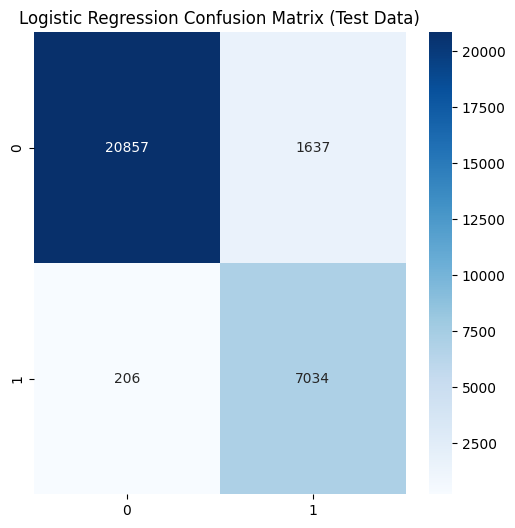

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report, confusion_matrix

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Predictions
lr_train_pred = lr_model.predict(X_train_resampled)
lr_test_pred = lr_model.predict(X_test_scaled)

# Metrics for train data
lr_train_accuracy = accuracy_score(y_train_resampled, lr_train_pred)
lr_train_precision = precision_score(y_train_resampled, lr_train_pred)
lr_train_recall = recall_score(y_train_resampled, lr_train_pred)
lr_train_f1 = f1_score(y_train_resampled, lr_train_pred)
lr_train_roc_auc = roc_auc_score(y_train_resampled, lr_train_pred)

print("Logistic Regression Train Data Metrics:")
print("Accuracy:", lr_train_accuracy)
print("Precision:", lr_train_precision)
print("Recall:", lr_train_recall)
print("F1-score:", lr_train_f1)
print("ROC AUC Score:", lr_train_roc_auc)
print()

# Metrics for test data
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)
lr_test_precision = precision_score(y_test, lr_test_pred)
lr_test_recall = recall_score(y_test, lr_test_pred)
lr_test_f1 = f1_score(y_test, lr_test_pred)
lr_test_roc_auc = roc_auc_score(y_test, lr_test_pred)

print("Logistic Regression Test Data Metrics:")
print("Accuracy:", lr_test_accuracy)
print("Precision:", lr_test_precision)
print("Recall:", lr_test_recall)
print("F1-score:", lr_test_f1)
print("ROC AUC Score:", lr_test_roc_auc)

print("Logistic Regression Test Data Classification Report:")
print(classification_report(y_test, lr_test_pred))

# Confusion Matrix for test data
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, lr_test_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix (Test Data)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Decision Tree Train Data Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC Score: 1.0

Decision Tree Test Data Metrics:
Accuracy: 0.9999663684670748
Precision: 1.0
Recall: 0.9998618784530386
F1-score: 0.9999309344567995
ROC AUC Score: 0.9999309392265193
Decision Tree Test Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



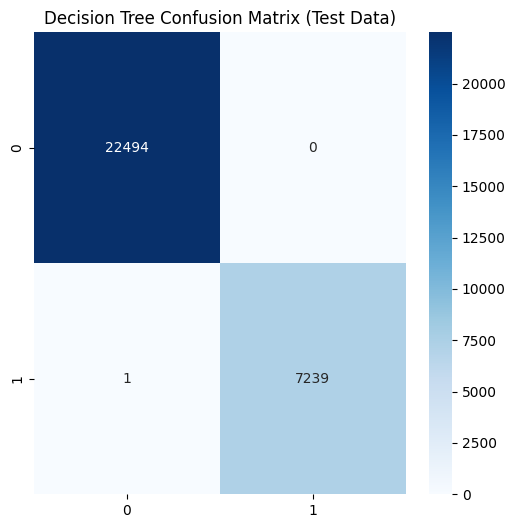

In [74]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Predictions
dt_train_pred = dt_model.predict(X_train_resampled)
dt_test_pred = dt_model.predict(X_test_scaled)

# Metrics for train data
dt_train_accuracy = accuracy_score(y_train_resampled, dt_train_pred)
dt_train_precision = precision_score(y_train_resampled, dt_train_pred)
dt_train_recall = recall_score(y_train_resampled, dt_train_pred)
dt_train_f1 = f1_score(y_train_resampled, dt_train_pred)
dt_train_roc_auc = roc_auc_score(y_train_resampled, dt_train_pred)

print("Decision Tree Train Data Metrics:")
print("Accuracy:", dt_train_accuracy)
print("Precision:", dt_train_precision)
print("Recall:", dt_train_recall)
print("F1-score:", dt_train_f1)
print("ROC AUC Score:", dt_train_roc_auc)
print()

# Metrics for test data
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
dt_test_precision = precision_score(y_test, dt_test_pred)
dt_test_recall = recall_score(y_test, dt_test_pred)
dt_test_f1 = f1_score(y_test, dt_test_pred)
dt_test_roc_auc = roc_auc_score(y_test, dt_test_pred)

print("Decision Tree Test Data Metrics:")
print("Accuracy:", dt_test_accuracy)
print("Precision:", dt_test_precision)
print("Recall:", dt_test_recall)
print("F1-score:", dt_test_f1)
print("ROC AUC Score:", dt_test_roc_auc)

print("Decision Tree Test Data Classification Report:")
print(classification_report(y_test, dt_test_pred))

# Confusion Matrix for test data
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, dt_test_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix (Test Data)")
plt.show()


From the above Decision Tree is our best model with good accuracy scores on both train and test data of Decision Tree Train Data Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC Score: 1.0

Decision Tree Test Data Metrics:
Accuracy: 0.9999663684670748
Precision: 1.0
Recall: 0.9998618784530386
F1-score: 0.9999309344567995
ROC AUC Score: 0.9999309392265193

Indicating absence of both overfitting and underfitting.

# Saving the Preprocessing Steps and Best Model

In [77]:
import pickle
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Save the trained model
with open('dt_model.pkl', 'wb') as model_file:
    pickle.dump(dt_model, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the SMOTE object
with open('smote.pkl', 'wb') as smote_file:
    pickle.dump(smote, smote_file)

# Save the label encoder mappings
with open('label_mappings.pkl', 'wb') as label_mappings_file:
    pickle.dump(label_mappings, label_mappings_file)
